In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import xarray as xr
import glob
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import numpy.ma as ma
import matplotlib.colors as colors
from statistics import mode
import pandas as pd
from scipy import signal
from cartopy.util import add_cyclic_point
from scipy.stats import linregress
import statsmodels.api as sm

home_dir = '/glade/work/devond/'
import sys  
sys.path.insert(0, home_dir)

from functions import * 

crs_sp = ccrs.SouthPolarStereo(central_longitude=0)
crs_ll = ccrs.PlateCarree()


In [2]:
era = xr.open_dataset('/glade/work/devond/ERA5/all.nc')['t2m']-273.15
era = era.sel(latitude = slice(-60,-90))
era = era.sel(time = slice('1979-01-01', '2015-01-01'))

era_mask = xr.open_dataset('/glade/work/devond/AIS_masks/model_masks/ERA_masks.nc')
era_mask = era_mask.sel(lat = slice(-60,-90))
era_ism = era_mask.full_ism.values

era = era*era_ism
era_mam, era_jja, era_son, era_djf = get_seasonal_data(era, 'mean')

/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [3]:
era_mam_trend, era_p_mam = calculate_trend(era_mam)
era_jja_trend, era_p_jja = calculate_trend(era_jja)
era_son_trend, era_p_son = calculate_trend(era_son)
era_djf_trend, era_p_djf = calculate_trend(era_djf)

In [21]:
cesm = xr.open_dataset('/glade/work/devond/CESM/temperature/CESM2_tas_hist.nc')['tas']-273.15
cesm = cesm.sel(lat = slice(-90,-60))
cesm = cesm.sel(time = slice('1979-01-01', '2015-01-01'))

cesm_mask = xr.open_dataset('/glade/work/devond/AIS_masks/model_masks/CESM_masks.nc')
cesm_mask = cesm_mask.sel(lat = slice(-90,-60))
cesm_ism = cesm_mask.full_ism.values
cesm_ism[cesm_ism>0]=1
cesm_ism[cesm_ism==0]=np.nan

lon = cesm_mask.lon.values
cesm_ism2, lon2 = add_cyclic_point(cesm_ism, coord = lon)

cesm = cesm.mean(dim='ensemble')*cesm_ism
cesm_mam, cesm_jja, cesm_son, cesm_djf = get_seasonal_data(cesm, 'mean')

/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
cesm1 = xr.open_dataset('/glade/work/devond/CESM/temperature/CESM1lens_TREFHT_hist2.nc')['TREFHT']-273.15
cesm1 = cesm1.sel(lat = slice(-90,-60))
cesm1 = cesm1.sel(time = slice('1979-01-01', '2015-01-01'))

cesm1 = cesm1.mean(dim='ensemble')*cesm_ism
#cesm_mam, cesm_jja, cesm_son, cesm_djf = get_seasonal_data(cesm, 'mean')

In [22]:
cesm_mam_trend, cesm_p_mam = calculate_trend(cesm_mam)
cesm_jja_trend, cesm_p_jja = calculate_trend(cesm_jja)
cesm_son_trend, cesm_p_son = calculate_trend(cesm_son)
cesm_djf_trend, cesm_p_djf = calculate_trend(cesm_djf)

In [23]:
cesm_mam_trend2, lon2 = add_cyclic_point(cesm_mam_trend, coord = lon)
cesm_jja_trend2, lon2 = add_cyclic_point(cesm_jja_trend, coord = lon)
cesm_son_trend2, lon2 = add_cyclic_point(cesm_son_trend, coord = lon)
cesm_djf_trend2, lon2 = add_cyclic_point(cesm_djf_trend, coord = lon)

In [24]:
def get_significant(data):
    data[data>0.05] = 0
    data[data==0]=np.nan
    data[~np.isnan(data)] = 1
    return data

In [25]:
era_p_mam = get_significant(era_p_mam)
era_p_jja = get_significant(era_p_jja)
era_p_son = get_significant(era_p_son)
era_p_djf = get_significant(era_p_djf)
#cesm_p_mam = get_significant(cesm_p_mam)
cesm_p_jja = get_significant(cesm_p_jja)
cesm_p_son = get_significant(cesm_p_son)
cesm_p_djf = get_significant(cesm_p_djf)



/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/matplotlib/contour.py:1132: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/matplotlib/contour.py:1134: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


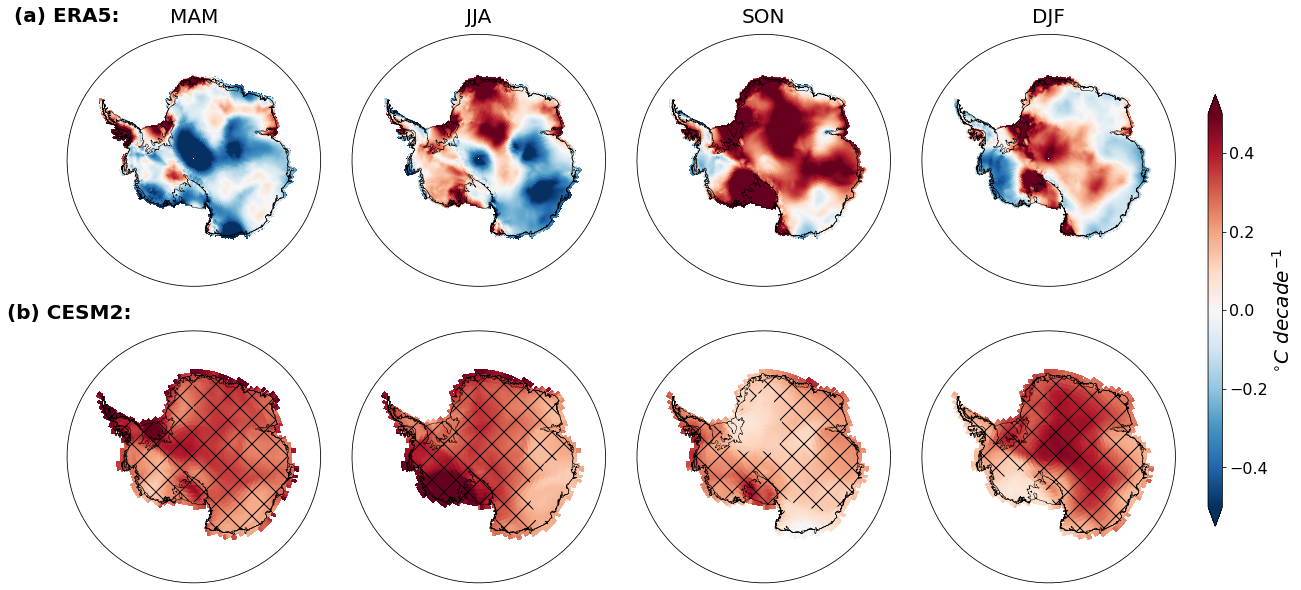

In [26]:
fig = plt.figure(figsize = (20, 10))
gs=GridSpec(2,8)
plt.rcParams['axes.titlepad'] =14

ax1 = plt.subplot(gs[0,0:2],projection=crs_sp)
plot_antarctica(ax1,-60)
im1 = ax1.pcolormesh(era.longitude, era.latitude, era_mam_trend*era_ism*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax1.set_title('MAM', fontsize = 20)
ax1.contourf(era.longitude, era.latitude, era_p_mam, colors = 'yellow', hatches=['x'],transform = crs_ll, alpha = 0)

ax2 = plt.subplot(gs[0,2:4],projection=crs_sp)
plot_antarctica(ax2,-60)
im2 = ax2.pcolormesh(era.longitude, era.latitude, era_jja_trend*era_ism*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax2.set_title('JJA', fontsize = 20)
ax2.contourf(era.longitude, era.latitude, era_p_jja, colors = 'yellow', hatches=['x'],transform = crs_ll, alpha = 0)

ax3 = plt.subplot(gs[0,4:6],projection=crs_sp)
plot_antarctica(ax3,-60)
im3 = ax3.pcolormesh(era.longitude, era.latitude, era_son_trend*era_ism*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax3.set_title('SON', fontsize = 20)
ax3.contourf(era.longitude, era.latitude, era_p_son, colors = 'yellow', hatches=['x'],transform = crs_ll, alpha = 0)

ax4 = plt.subplot(gs[0,6:],projection=crs_sp)
plot_antarctica(ax4,-60)
im4 = ax4.pcolormesh(era.longitude, era.latitude, era_djf_trend*era_ism*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax4.set_title('DJF', fontsize = 20)
ax4.contourf(era.longitude, era.latitude, era_p_djf, colors = 'yellow', hatches=['x'],transform = crs_ll, alpha = 0)

ax5 = plt.subplot(gs[1,0:2],projection=crs_sp)
plot_antarctica(ax5,-60)
im5 = ax5.pcolormesh(lon2, cesm.lat, cesm_mam_trend2*cesm_ism2*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax5.contourf(lon, cesm.lat, cesm_p_mam, hatches=['x'],transform = crs_ll, alpha=0)

ax6 = plt.subplot(gs[1,2:4],projection=crs_sp)
plot_antarctica(ax6,-60)
im6 = ax6.pcolormesh(lon2, cesm.lat, cesm_jja_trend2*cesm_ism2*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax6.contourf(lon, cesm.lat, cesm_p_jja, hatches=['x'],transform = crs_ll, alpha=0)

ax7 = plt.subplot(gs[1,4:6],projection=crs_sp)
plot_antarctica(ax7,-60)
im7 = ax7.pcolormesh(lon2, cesm.lat, cesm_son_trend2*cesm_ism2*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax7.contourf(lon, cesm.lat, cesm_p_son, hatches=['x'],transform = crs_ll, alpha=0)

ax8 = plt.subplot(gs[1,6:],projection=crs_sp)
plot_antarctica(ax8,-60)
im8 = ax8.pcolormesh(lon2, cesm.lat, cesm_djf_trend2*cesm_ism2*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax8.contourf(lon, cesm.lat, cesm_p_djf, hatches=['x'],transform = crs_ll, alpha=0)

ax1.text(0.2, 1.12, '(a) ERA5:', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
ax5.text(0.25, 1.12, '(b) CESM2:', transform=ax5.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

cbar_ax = fig.add_axes([0.92, 0.2, 0.01, 0.6])
cb = fig.colorbar(im1, cax=cbar_ax, orientation = 'vertical', extend = 'both')
cb.set_label(label='$^{\circ}C~decade^{-1}$', size=20)
cb.ax.tick_params(labelsize=16)


plt.savefig('temperature_trends.png', dpi = 300, bbox_inches = 'tight', transparent = 'True')

In [45]:
cesm_area = cesm_mask.area.values
mam1 = np.nansum(cesm_mam_trend*cesm_ism*cesm_area)/np.nansum(cesm_ism*cesm_area)*10
jja1 = np.nansum(cesm_jja_trend*cesm_ism*cesm_area)/np.nansum(cesm_ism*cesm_area)*10
son1 = np.nansum(cesm_son_trend*cesm_ism*cesm_area)/np.nansum(cesm_ism*cesm_area)*10
djf1 = np.nansum(cesm_djf_trend*cesm_ism*cesm_area)/np.nansum(cesm_ism*cesm_area)*10

print(f'Average MAM CESM2 trend = {mam1:0.2f} C/decade')
print(f'Average JJA CESM2 trend = {jja1:0.2f} C/decade')
print(f'Average SON CESM2 trend = {son1:0.2f} C/decade')
print(f'Average DJF CESM2 trend = {djf1:0.2f} C/decade')

Average MAM CESM2 trend = 0.31 C/decade
Average JJA CESM2 trend = 0.30 C/decade
Average SON CESM2 trend = 0.18 C/decade
Average DJF CESM2 trend = 0.28 C/decade


In [47]:
era_area = era_mask.area.values
mam2 = np.nansum(era_mam_trend*era_ism*era_area)/np.nansum(era_ism*era_area)*10
jja2 = np.nansum(era_jja_trend*era_ism*era_area)/np.nansum(era_ism*era_area)*10
son2 = np.nansum(era_son_trend*era_ism*era_area)/np.nansum(era_ism*era_area)*10
djf2 = np.nansum(era_djf_trend*era_ism*era_area)/np.nansum(era_ism*era_area)*10

print(f'Average MAM ERA trend = {mam2:0.2f} C/decade')
print(f'Average JJA ERA trend = {jja2:0.2f} C/decade')
print(f'Average SON ERA trend = {son2:0.2f} C/decade')
print(f'Average DJF ERA trend = {djf2:0.2f} C/decade')

Average MAM ERA trend = -0.12 C/decade
Average JJA ERA trend = 0.03 C/decade
Average SON ERA trend = 0.35 C/decade
Average DJF ERA trend = 0.09 C/decade


## Annual trend

In [58]:
era_annual = era.groupby(era.time.dt.year).mean()
era_annual_trend, era_p = calculate_trend(era_annual)
era_p = get_significant(era_p)

/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [49]:
cesm_annual = cesm.groupby(cesm.time.dt.year).mean()
cesm_annual_trend, cesm_p = calculate_trend(cesm_annual)
cesm_annual_trend, lon2 = add_cyclic_point(cesm_annual_trend, coord = lon)
cesm_p = get_significant(cesm_p)

/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [50]:
cesm1_annual = cesm1.groupby(cesm1.time.dt.year).mean()
cesm1_annual_trend, cesm1_p = calculate_trend(cesm1_annual)
cesm1_annual_trend, lon2 = add_cyclic_point(cesm1_annual_trend, coord = lon)
cesm1_p = get_significant(cesm1_p)

/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20200417/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


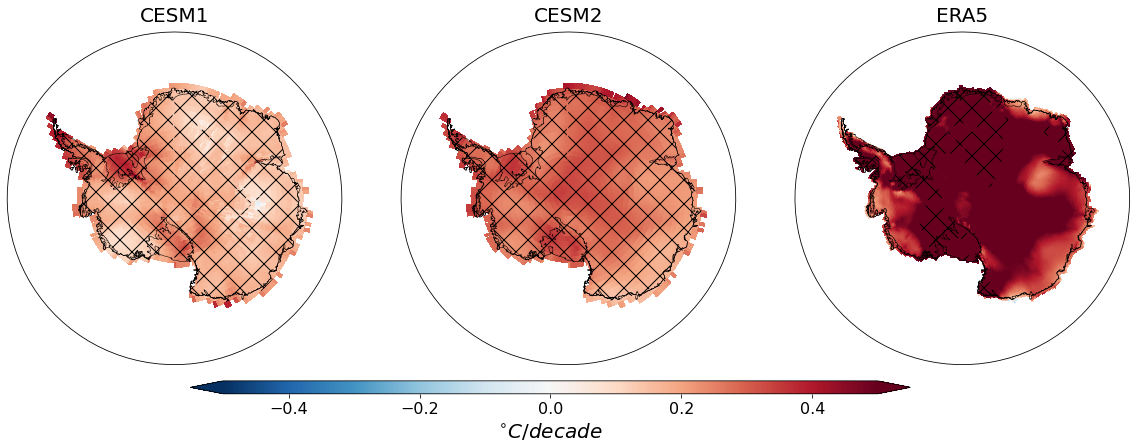

In [59]:
fig = plt.figure(figsize = (20, 6))
gs=GridSpec(1,3)
plt.rcParams['axes.titlepad'] =14

ax2 = plt.subplot(gs[0,0],projection=crs_sp)
plot_antarctica(ax2,-60)
im2 = ax2.pcolormesh(lon2, cesm.lat, cesm1_annual_trend*cesm_ism2*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax2.set_title('CESM1', fontsize = 20)
ax2.contourf(cesm.lon, cesm.lat, cesm1_p, colors = 'yellow', hatches=['x'],transform = crs_ll, alpha = 0)

ax1 = plt.subplot(gs[0,1],projection=crs_sp)
plot_antarctica(ax1,-60)
im1 = ax1.pcolormesh(lon2, cesm.lat, cesm_annual_trend*cesm_ism2*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax1.set_title('CESM2', fontsize = 20)
ax1.contourf(cesm.lon, cesm.lat, cesm_p, colors = 'yellow', hatches=['x'],transform = crs_ll, alpha = 0)

ax3 = plt.subplot(gs[0,2],projection=crs_sp)
plot_antarctica(ax3,-60)
im3 = ax3.pcolormesh(era.longitude, era.latitude, era_annual_trend*era_ism*10, transform = crs_ll, cmap = 'RdBu_r',vmin = -0.5, vmax = 0.5)
ax3.set_title('ERA5', fontsize = 20)
ax3.contourf(era.longitude, era.latitude, era_p, colors = 'yellow', hatches=['x'],transform = crs_ll, alpha = 0)

cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
cb = fig.colorbar(im1, cax=cbar_ax, orientation = 'horizontal', extend = 'both')
cb.set_label(label='$^{\circ}C/decade$', size=20)
cb.ax.tick_params(labelsize=16)

plt.savefig('annual_temp_trend.png', dpi = 300, bbox_inches = 'tight', transparent = True)


In [54]:
np.nansum(era_annual_trend * era_mask.area.values)/(np.nansum(era_mask.area.values*era_ism))*10

0.6286032218567514

In [55]:
cesm_area = cesm_mask.area.values
cesm_area, lon2 = add_cyclic_point(cesm_area, coord = lon)

In [56]:
np.nansum(cesm_annual_trend * cesm_area)/np.nansum(cesm_area*cesm_ism2)*10

0.2697878836150134

In [57]:
np.nansum(cesm1_annual_trend * cesm_area)/np.nansum(cesm_area*cesm_ism2)*10

0.18079424953214446